In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.DataFrame({'Start':['A','A','B','B'],'End':['A','B','A','C'],'Time':[3.1,1.2,95.3,541.],'Count':[1,4,79,261],})

,Start,End,Time,Count
0,A,A,3.1,1
1,A,B,1.2,4
2,B,A,95.3,79
3,B,C,541.0,261


In [3]:
tripdata = pd.read_parquet('../data/interim/comb_trips.gzip')

tripdata = tripdata.loc[tripdata.ended_at>tripdata.started_at]

In [4]:
tripdata.assign(started_at=tripdata.started_at.dt.tz_localize('America/New_York',ambiguous='NaT'),ended_at=tripdata.ended_at.dt.tz_localize('America/New_York',ambiguous='NaT'))

,started_at,ended_at,start_station_id,end_station_id,member_casual
0,2010-09-20 11:27:04-04:00,2010-09-20 11:43:56-04:00,31208,31108,member
1,2010-09-20 11:41:22-04:00,2010-09-20 11:42:23-04:00,31209,31209,member
2,2010-09-20 12:05:37-04:00,2010-09-20 12:50:27-04:00,31600,31100,member
3,2010-09-20 12:06:05-04:00,2010-09-20 12:29:32-04:00,31600,31602,member
4,2010-09-20 12:10:43-04:00,2010-09-20 12:34:17-04:00,31100,31201,member
...,...,...,...,...,...
259712,2022-11-04 07:26:25-04:00,2022-11-04 07:30:57-04:00,31275,31234,casual
259713,2022-11-18 09:16:49-05:00,2022-11-18 09:28:18-05:00,31122,31234,casual
259714,2022-11-25 14:16:12-05:00,2022-11-25 14:45:40-05:00,31646,31234,casual
259715,2022-11-25 15:19:03-05:00,2022-11-25 15:58:39-05:00,31423,31234,casual


In [5]:
time_summary = triptimedf.loc[:,['start_station_id','end_station_id','triptime']].groupby(['start_station_id','end_station_id']).agg({"triptime":[np.mean,np.median,np.std,np.min,np.max,np.count_nonzero]}).loc[:,'triptime'].reset_index()


NameError: name 'triptimedf' is not defined

In [ ]:
bi_out = time_summary.round(4).rename(columns={'start_station_id':'st','end_station_id':'end','count_nonzero':'TripCount','mean':'meanTime','median':'medianTime','std':'timeStddev','amin':'timeMin','amax':'timeMax'})
bi_out.to_csv('../data/processed/bidirectional_stats.csv',index=False)
# bi_out.to_sql() # TODO add sql server info

In [ ]:
sorted_st = time_summary.apply(lambda x:sorted([x.start_station_id,x.end_station_id]),axis=1,result_type='expand').astype('int')


In [ ]:
{
'mean_Foward':'mean_time_for', 
'median_Foward':'median_time_for', 
'std_Foward':'stdd_time_for', 
'amin_Foward':'min_time_for',
'amax_Foward':'max_time_for', 
'count_nonzero_Foward':'count_for', 
'st_sorted':'st',
'en_sorted':'en',
'mean_Backward':'mean_time_back', 
'median_Backward':'median_time_back', 
'std_Backward':'stdd_time_back', 
'amin_Backward':'min_time_back',
'amax_Backward':'max_time_back', 
'count_nonzero_Backward':'count_back', 
}
       

Index(['mean_Foward', 'median_Foward', 'std_Foward', 'amin_Foward',
       'amax_Foward', 'count_nonzero_Foward', 'st_sorted', 'en_sorted',
       'mean_Backward', 'median_Backward', 'std_Backward', 'amin_Backward',
       'amax_Backward', 'count_nonzero_Backward'],
      dtype='object')

In [ ]:
combo = pd.concat([time_summary,sorted_st],axis=1).rename(columns={0:'st_sorted',1:'en_sorted'})

combo = combo[combo.start_station_id==combo.st_sorted].drop(columns=['start_station_id','end_station_id']).merge(combo[combo.start_station_id!=combo.st_sorted].drop(columns=['start_station_id','end_station_id']),how='outer',on=['st_sorted','en_sorted'],suffixes=('_Foward','_Backward'))

combo = combo.rename(
    columns=
    {
'mean_Foward':'mean_time_for', 
'median_Foward':'median_time_for', 
'std_Foward':'stdd_time_for', 
'amin_Foward':'min_time_for',
'amax_Foward':'max_time_for', 
'count_nonzero_Foward':'count_for', 
'st_sorted':'st',
'en_sorted':'en',
'mean_Backward':'mean_time_back', 
'median_Backward':'median_time_back', 
'std_Backward':'stdd_time_back', 
'amin_Backward':'min_time_back',
'amax_Backward':'max_time_back', 
'count_nonzero_Backward':'count_back', 
}
)
combo

,mean_time_for,median_time_for,stdd_time_for,min_time_for,max_time_for,count_for,st,en,mean_time_back,median_time_back,stdd_time_back,min_time_back,max_time_back,count_back
0,62.238126,35.883333,140.162512,0.050000,3421.683333,2097.0,31000,31000,NaN,NaN,NaN,NaN,NaN,NaN
1,15.185694,7.383333,22.214589,1.133333,166.583333,360.0,31000,31001,11.850462,6.450000,18.907300,1.283333,133.183333,397.0
2,39.705084,12.016667,68.929071,1.000000,901.833333,554.0,31000,31002,22.417731,6.633333,38.966734,1.000000,234.250000,454.0
3,20.430927,3.650000,32.521158,1.383333,217.950000,561.0,31000,31003,15.471803,3.550000,34.367699,1.416667,326.966667,464.0
4,8.272299,5.083333,15.660229,2.366667,213.600000,216.0,31000,31004,5.980881,4.116667,5.297891,2.050000,38.033333,265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91839,NaN,NaN,NaN,NaN,NaN,NaN,31280,32901,28.833333,28.833333,NaN,28.833333,28.833333,1.0
91840,NaN,NaN,NaN,NaN,NaN,NaN,31602,32901,49.466667,49.466667,NaN,49.466667,49.466667,1.0
91841,NaN,NaN,NaN,NaN,NaN,NaN,32010,32901,14.091667,14.091667,0.388909,13.816667,14.366667,2.0
91842,NaN,NaN,NaN,NaN,NaN,NaN,32049,32901,16.422222,16.466667,0.302459,16.100000,16.700000,3.0


In [ ]:
time_summary.set_index(['start_station_id','end_station_id'])

mean     median         std       amin  \
start_station_id end_station_id                                                
31000            31000           62.238126  35.883333  140.162512   0.050000   
                 31001           15.185694   7.383333   22.214589   1.133333   
                 31002           39.705084  12.016667   68.929071   1.000000   
                 31003           20.430927   3.650000   32.521158   1.383333   
                 31004            8.272299   5.083333   15.660229   2.366667   
...                                    ...        ...         ...        ...   
32901            32011           11.611111  11.750000    1.172636  10.250000   
                 32049           16.422222  16.466667    0.302459  16.100000   
                 32901            7.496667   3.908333    9.079171   0.066667   
32902            32900            4.166667   4.166667         NaN   4.166667   
                 32902            0.171429   0.083333    0.248647   0.050000   

                                        amax  count_nonzero  
start_station_id end_station_id                              
31000            31000           3421.683333           2097  
                 31001            166.583333            360  
                 31002            901.833333            554  
                 31003            217.950000            561  
                 31004            213.600000            216  
...                                      ...            ...  
32901            32011             12.900000              6  
                 32049             16.700000              3  
                 32901             26.333333             10  
32902            32900              4.166667              1  
                 32902              0.733333              7  

[159099 rows x 6 columns]

In [ ]:
time_summary.to_csv('../data/interim/timedata.csv',index=False)

<AxesSubplot:xlabel='ended_at'>

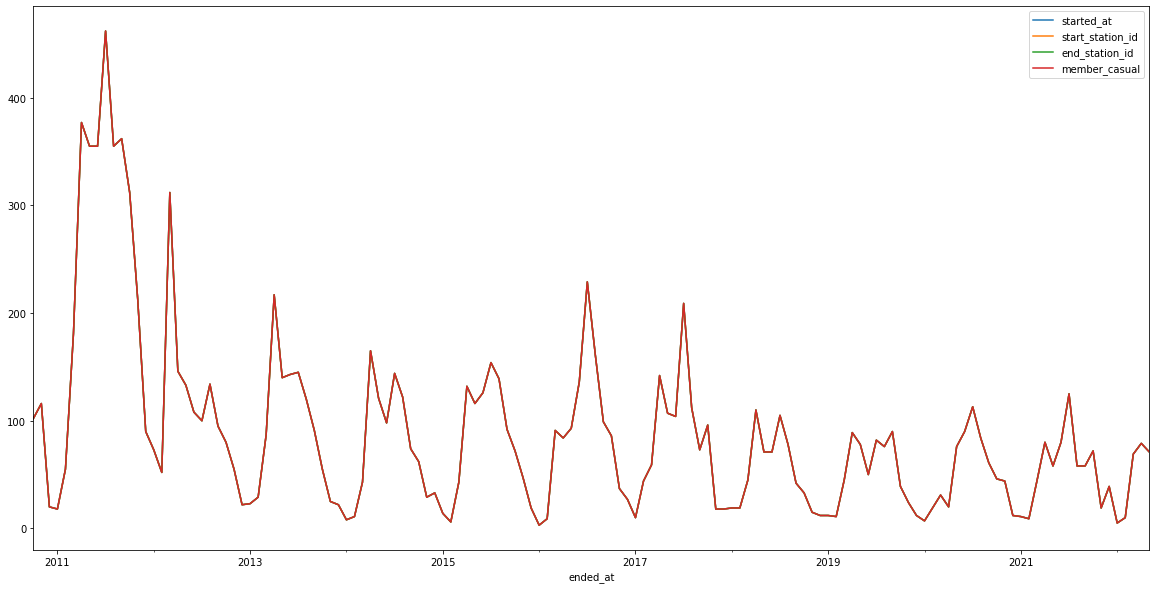

In [ ]:
tripdata.loc[(tripdata.start_station_id==31217)&(tripdata.end_station_id==31217)].set_index('ended_at').resample('1M').count().plot(figsize=(20,10))